**RESERVOIR ESTIMATION BY USING MONTE CARLO SIMULATION**

*Importation of necessary libraries;*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from numpy.random import rand  # for uniform distribution
from numpy.random import randn # for normal distribution


*Conversion of excel file into a dataframe and doing some arrangments on it;*

In [5]:
properties = pd.read_excel("Reservoir Properties.xlsx")
properties.reset_index(inplace=True)
properties.drop("level_0",axis=1,inplace=True)
properties.drop("index",axis=1,inplace=True)
properties.rename(columns={"Φe ":"Porosity","So ":"OilSaturation"}, inplace=True)


*Defining the area of reservoir and formation volume factor of oil which are not present in the excel file;*

In [6]:
Areas=(8264*43560,8918*43560) # min and max values
Bo=1.0680471

*Defining min. and max. values of each property;*

In [7]:
# defining min. and max. values:
MaxPor=properties["Porosity"].max()
MinPor=properties["Porosity"].min()
MaxThick=properties["Thickness"].max()
MinThick=properties["Thickness"].min()       
MaxSo=properties["OilSaturation"].max()
MinSo=properties["OilSaturation"].min()
MaxArea=max(Areas)
MinArea=min(Areas)


*Generating 10,000 random values of each property by using normal distribution and defining into numpy array forms, in the range of their min. and max. values;*

In [8]:
np.random.seed(123) 
RandomPor= np.clip(np.random.normal(MinPor, MaxPor, size=10000),MinPor, MaxPor)

np.random.seed(124) 
RandomArea=np.clip(np.random.normal(MinArea, MaxArea, size=10000),MinArea, MaxArea)

np.random.seed(128)
RandomThick=np.clip(np.random.normal(MinThick, MaxThick, size=10000),MinThick, MaxThick)

np.random.seed(134)
RandomSo=np.clip(np.random.normal(MinSo, MaxSo, size=10000),MinSo, MaxSo)

RandomOOIP=np.array(0.18*RandomArea*RandomThick*RandomPor*RandomSo/Bo) # OOIP formula.
# There is 0.18 multiply in order to convert ft^3 to bbl.



*Generating a new dataframe which includes all random values generated;*

In [9]:
RandomValues = pd.DataFrame({ "Porosity": RandomPor,
                             "Area": RandomArea,
                             "Thickness": RandomThick,
                             "Saturation": RandomSo,
                             "OOIP,STB":RandomOOIP
                             })
RandomValues

,Porosity,Area,Thickness,Saturation,"OOIP,STB"
0,0.082176,388468080.0,14.000000,0.177349,1.335789e+07
1,0.258705,359979840.0,43.101158,0.716108,4.844313e+08
2,0.155384,359979840.0,46.822143,0.716108,3.160789e+08
3,0.082176,388468080.0,14.000000,0.388710,2.927758e+07
4,0.082176,359979840.0,35.578990,0.716108,1.270212e+08
...,...,...,...,...,...
9995,0.082176,388468080.0,36.278446,0.177349,3.461454e+07
9996,0.082176,388468080.0,47.000000,0.240125,6.071799e+07
9997,0.082176,359979840.0,20.373807,0.276414,2.807604e+07
9998,0.232733,388468080.0,14.000000,0.177349,3.783132e+07


*Generating a new dataframe which includes; p10, p50, and p90 values of OOIP:*

In [26]:
P10 = RandomValues["OOIP,STB"].quantile(0.1)
P50 = RandomValues["OOIP,STB"].quantile(0.5)
P90 = RandomValues["OOIP,STB"].quantile(0.9)

MonteCarlo_result= pd.DataFrame({"P10":[P10],
                     "P50":[P50],
                     "P90":[P90]})

# İstedğim birim ie gösterebilmek için ayrı bir dataframe oluşturuyorum
BirimliP10=(MonteCarlo_result["P10"]/10**6).round(2).map("{} MMSTB".format)
BirimliP50=(MonteCarlo_result["P50"]/10**6).round(2).map("{} MMSTB".format)
BirimliP90=(MonteCarlo_result["P90"]/10**6).round(2).map("{} MMSTB".format)

MonteCarlo_result_birimli= pd.DataFrame({
    "P10":BirimliP10,
    "P50":BirimliP50,
    "P90":BirimliP90
})

MonteCarlo_result_birimli



,P10,P50,P90
0,13.36 MMSTB,49.98 MMSTB,175.7 MMSTB


*Generating a histogram including the cumulative percentage line showing the p10, p50, and p90 values;*

Text(0.5, 1.0, 'OOIP HISTOGRAM')

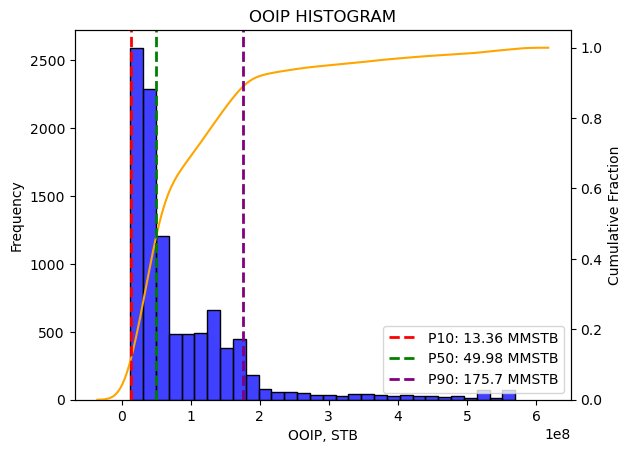

In [24]:
Histogram=plt.figure()
ax1=sns.histplot(RandomValues["OOIP,STB"], kde=False,color="blue",bins=30)
ax2=plt.twinx()
ax2=sns.kdeplot(RandomValues["OOIP,STB"], cumulative=True, color="orange",ax=ax2)

ax1.set_xlabel("OOIP, STB") # değerleri formatlayamadım
ax1.set_ylabel("Frequency")
ax2.set_ylabel("Cumulative Fraction")

plt.axvline(x=float(MonteCarlo_result["P10"]), color="red", linestyle="--", linewidth=2, label="P10: {}".format(BirimliP10.values[0]))
plt.axvline(x=float(MonteCarlo_result["P50"]), color="green", linestyle="--", linewidth=2, label="P50: {}".format(BirimliP50.values[0]))
plt.axvline(x=float(MonteCarlo_result["P90"]), color="purple", linestyle="--", linewidth=2, label="P90: {}".format(BirimliP90.values[0]))
plt.legend(loc=0)

plt.title("OOIP HISTOGRAM")

